### INTRODUCTION
### our goal is to find out which aircrafts to purchase for either commercial or private enterprises. we will analyze data on aviation flight histories to determine which aircraft is best suited to our ventures based on the number of engines, engine type, make, model and the safety level associated with them.


we first need to import the necessary libraries that we will use to clean,analyze and visualize the data in order to gain the relevant insights.

In [2]:
#importing the libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


we will use data from AviationData.csv and NTSB_database.csv.
We begin by loading the AviationData.csv into a dataframe called aviation_data_df

In [3]:
#loading the datasets
#we set the encoding to Latin 1 since it isnt the default UTF-8
aviation_data_df = pd.read_csv("AviationData.csv", encoding = "Latin 1", low_memory=False)


To inspect the dataframe structure we will use .info()

In [4]:
#inspecting the dataframe structure
aviation_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

We can also check for null values for all columns

In [5]:
#we realise there are a number of inconsistent column values which we need to correct because many have missing values,some are nul
aviation_data_df.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38640
Airport.Name              36099
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1317
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6381
Publication.Date          13771
dtype: i

Our dataframe has 31 columns with inconsistent rows.
We however have adequate data in the columns that are useful to us hence we can retrieve those while dropping others.

check for duplicated rows

In [6]:
aviation_data_df["Event.Id"].duplicated().sum()

938

These have to be dropped because they are redundant.We will use the subset Event.Id since we will use this column to merge data in our other csv file called NTSB_database.csv 

In [7]:
#dropping duplicates using the Event.Id column as a subset
aviation_data_df.drop_duplicates(subset="Event.Id",inplace=True, keep="first")

In [8]:
#confirm that the duplicates have been dropped
aviation_data_df["Event.Id"].duplicated().sum()

0

We now inspect the columns individually in order to account for missing or null values by either keeping,discarding or replacing the values. We can also change the datatype of some of the columns to the most appropriate type.

In [9]:
#changing the Event.Date type from object to datetime
aviation_data_df["Event.Date"]=pd.to_datetime(aviation_data_df["Event.Date"])

In [10]:
aviation_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87951 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                87951 non-null  object        
 1   Investigation.Type      87951 non-null  object        
 2   Accident.Number         87951 non-null  object        
 3   Event.Date              87951 non-null  datetime64[ns]
 4   Location                87899 non-null  object        
 5   Country                 87729 non-null  object        
 6   Latitude                34212 non-null  object        
 7   Longitude               34203 non-null  object        
 8   Airport.Code            49601 non-null  object        
 9   Airport.Name            52117 non-null  object        
 10  Injury.Severity         86961 non-null  object        
 11  Aircraft.damage         84848 non-null  object        
 12  Aircraft.Category       32181 non-null  object

Moving on to the Location column.

In [11]:
#view the first 10 rows
aviation_data_df["Location"].head(10)

0     MOOSE CREEK, ID
1      BRIDGEPORT, CA
2       Saltville, VA
3          EUREKA, CA
4          Canton, OH
5          BOSTON, MA
6          COTTON, MN
7         PULLMAN, WA
8    EAST HANOVER, NJ
9    JACKSONVILLE, FL
Name: Location, dtype: object

 we realize it contains both the city and state name. we can split these into two seperate columns named City and State respectively.

In [12]:
#we will use split the string into two using the , as a delimiter
aviation_data_df[["City","State"]]=aviation_data_df["Location"].str.split(",",1,expand=True)

In [13]:
#we can then drop the Location column (as it has been replaced by city and state column) along with other columns which are not relevant for our research.
aviation_data_df.drop(columns=["Report.Status","Broad.phase.of.flight","Weather.Condition","Longitude","Latitude","Airport.Code","Airport.Name","Accident.Number","Location","Air.carrier","Registration.Number","FAR.Description","Schedule","Publication.Date"], axis = 1,inplace=True)

we can inspect the new dataframe once more and we can see datetime datatype and we have created two new columns and dropped a number of other columns.

In [14]:
aviation_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87951 entries, 0 to 88888
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                87951 non-null  object        
 1   Investigation.Type      87951 non-null  object        
 2   Event.Date              87951 non-null  datetime64[ns]
 3   Country                 87729 non-null  object        
 4   Injury.Severity         86961 non-null  object        
 5   Aircraft.damage         84848 non-null  object        
 6   Aircraft.Category       32181 non-null  object        
 7   Make                    87888 non-null  object        
 8   Model                   87859 non-null  object        
 9   Amateur.Built           87851 non-null  object        
 10  Number.of.Engines       81924 non-null  float64       
 11  Engine.Type             80927 non-null  object        
 12  Purpose.of.flight       81829 non-null  object

Now that we have a good number of columns we can use ,the next step is to deal with null, eroneous and missing values

In [15]:
#checking for null, missing or eroneous values
aviation_data_df.isna().sum()

Event.Id                      0
Investigation.Type            0
Event.Date                    0
Country                     222
Injury.Severity             990
Aircraft.damage            3103
Aircraft.Category         55770
Make                         63
Model                        92
Amateur.Built               100
Number.of.Engines          6027
Engine.Type                7024
Purpose.of.flight          6122
Total.Fatal.Injuries      11267
Total.Serious.Injuries    12322
Total.Minor.Injuries      11760
Total.Uninjured            5863
City                         52
State                       548
dtype: int64

Moving on to Country column with 222 missing values. 
the missing rows are insignificant hence we will drop them without introducing bias

In [16]:
#dropping rows with missing values for Country column
aviation_data_df.dropna(subset=["Country"], inplace=True)

For longitude and latitude the missing rows are significant, however we have country column which can also tell us the accident sites hence we will drop them.

In [17]:
#viewing the first 10 rows
aviation_data_df.head(10)

,Event.Id,Investigation.Type,Event.Date,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,City,State
0,20001218X45444,Accident,1948-10-24,United States,Fatal(2),Destroyed,NaN,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,MOOSE CREEK,ID
1,20001218X45447,Accident,1962-07-19,United States,Fatal(4),Destroyed,NaN,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,BRIDGEPORT,CA
2,20061025X01555,Accident,1974-08-30,United States,Fatal(3),Destroyed,NaN,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,Saltville,VA
3,20001218X45448,Accident,1977-06-19,United States,Fatal(2),Destroyed,NaN,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,EUREKA,CA
4,20041105X01764,Accident,1979-08-02,United States,Fatal(1),Destroyed,NaN,Cessna,501,No,NaN,NaN,Personal,1.0,2.0,NaN,0.0,Canton,OH
5,20170710X52551,Accident,1979-09-17,United States,Non-Fatal,Substantial,Airplane,Mcdonnell Douglas,DC9,No,2.0,Turbo Fan,NaN,NaN,NaN,1.0,44.0,BOSTON,MA
6,20001218X45446,Accident,1981-08-01,United States,Fatal(4),Destroyed,NaN,Cessna,180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,COTTON,MN
7,20020909X01562,Accident,1982-01-01,United States,Non-Fatal,Substantial,Airplane,Cessna,140,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,2.0,PULLMAN,WA
8,20020909X01561,Accident,1982-01-01,United States,Non-Fatal,Substantial,Airplane,Cessna,401B,No,2.0,Reciprocating,Business,0.0,0.0,0.0,2.0,EAST HANOVER,NJ
9,20020909X01560,Accident,1982-01-01,United States,Non-Fatal,Substantial,NaN,North American,NAVION L-17B,No,1.0,Reciprocating,Personal,0.0,0.0,3.0,0.0,JACKSONVILLE,FL


Injury.Severity is categorical data. without losing data in other rows, we can replace the missing values with unknown

In [18]:
#filling the missing rows with string unknown
aviation_data_df["Injury.Severity"].fillna("unknown", inplace=True)

In [19]:
aviation_data_df["Injury.Severity"].isna().sum()

0

For Aircraft.damage column our missing values could mean there wasnt any damage hence we can create a new category, unknown, for them instead of dropping the rows

In [20]:
#we create a new category called unknown and use it to fill the null values
aviation_data_df["Aircraft.damage"] = aviation_data_df["Aircraft.damage"].astype("category")
aviation_data_df["Aircraft.damage"] = aviation_data_df["Aircraft.damage"].cat.add_categories("unknown")
aviation_data_df["Aircraft.damage"].fillna("unknown", inplace = True)

In [21]:
aviation_data_df["Aircraft.damage"].isna().sum()

0

we will repeat the process for Aircraft category as deleting the rows will result in significant loss of data

In [22]:
#we create a new category called unknown and use it to fill the null values
aviation_data_df["Aircraft.Category"] = aviation_data_df["Aircraft.Category"].astype("category")
aviation_data_df["Aircraft.Category"] = aviation_data_df["Aircraft.Category"].cat.add_categories("unknown")
aviation_data_df["Aircraft.Category"].fillna("unknown", inplace = True)

For the make and model, dropping the rows will have a negligible impact on the analysis since we do not want to introduce unneccessary bias

In [23]:
#dropping the missing rows using make and model column as subsets
aviation_data_df.dropna(subset=["Make"], inplace=True)
aviation_data_df.dropna(subset=["Model"], inplace=True)


for column called Amateur built we will inspect first for the unique values

In [24]:
aviation_data_df["Amateur.Built"].unique()

array(['No', 'Yes', nan], dtype=object)

we will add the category unknown for the missing rows 

In [25]:
#we create a new category called unknown and use it to fill the null values
aviation_data_df["Amateur.Built"] = aviation_data_df["Amateur.Built"].astype("category")
aviation_data_df["Amateur.Built"] = aviation_data_df["Amateur.Built"].cat.add_categories("unknown")
aviation_data_df["Amateur.Built"].fillna("unknown", inplace = True)

For the Number of Engines column we can fill in the missing values using the mode

In [26]:
#we will use the mode to fill the missing values
aviation_data_df["Number.of.Engines"] = aviation_data_df["Number.of.Engines"].fillna(aviation_data_df["Number.of.Engines"].mode()[0])

In [27]:
#to view the first 15 rows
aviation_data_df.head(15)

,Event.Id,Investigation.Type,Event.Date,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,City,State
0,20001218X45444,Accident,1948-10-24,United States,Fatal(2),Destroyed,unknown,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,MOOSE CREEK,ID
1,20001218X45447,Accident,1962-07-19,United States,Fatal(4),Destroyed,unknown,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,BRIDGEPORT,CA
2,20061025X01555,Accident,1974-08-30,United States,Fatal(3),Destroyed,unknown,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,Saltville,VA
3,20001218X45448,Accident,1977-06-19,United States,Fatal(2),Destroyed,unknown,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,EUREKA,CA
4,20041105X01764,Accident,1979-08-02,United States,Fatal(1),Destroyed,unknown,Cessna,501,No,1.0,NaN,Personal,1.0,2.0,NaN,0.0,Canton,OH
5,20170710X52551,Accident,1979-09-17,United States,Non-Fatal,Substantial,Airplane,Mcdonnell Douglas,DC9,No,2.0,Turbo Fan,NaN,NaN,NaN,1.0,44.0,BOSTON,MA
6,20001218X45446,Accident,1981-08-01,United States,Fatal(4),Destroyed,unknown,Cessna,180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,COTTON,MN
7,20020909X01562,Accident,1982-01-01,United States,Non-Fatal,Substantial,Airplane,Cessna,140,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,2.0,PULLMAN,WA
8,20020909X01561,Accident,1982-01-01,United States,Non-Fatal,Substantial,Airplane,Cessna,401B,No,2.0,Reciprocating,Business,0.0,0.0,0.0,2.0,EAST HANOVER,NJ
9,20020909X01560,Accident,1982-01-01,United States,Non-Fatal,Substantial,unknown,North American,NAVION L-17B,No,1.0,Reciprocating,Personal,0.0,0.0,3.0,0.0,JACKSONVILLE,FL


For the column engine.type we can replace the missing values with unknown

In [28]:
#inspecting for the different categories
aviation_data_df["Engine.Type"].unique()

array(['Reciprocating', nan, 'Turbo Fan', 'Turbo Shaft', 'Unknown',
       'Turbo Prop', 'Turbo Jet', 'None', 'Electric', 'Hybrid Rocket',
       'Geared Turbofan', 'LR', 'NONE', 'UNK'], dtype=object)

In [29]:
#we create a new category called unknown and use it to fill the null values
aviation_data_df["Engine.Type"] = aviation_data_df["Engine.Type"].astype("category")
aviation_data_df["Engine.Type"] = aviation_data_df["Engine.Type"].cat.add_categories("unknown")
aviation_data_df["Engine.Type"].fillna("unknown", inplace = True)
aviation_data_df.loc[aviation_data_df["Purpose.of.flight"]=="Unknown","Purpose.of.flight"] = "unknown"

In [30]:
#viewing the count for the unique categories
aviation_data_df["Engine.Type"].value_counts()

Reciprocating      68742
unknown             6948
Turbo Shaft         3499
Turbo Prop          3312
Turbo Fan           2379
Unknown             2009
Turbo Jet            682
None                  19
Geared Turbofan       12
Electric              10
NONE                   2
LR                     2
UNK                    1
Hybrid Rocket          1
Name: Engine.Type, dtype: int64

We now take a look at the purpose of flight column

In [31]:
#inspecting the column categories
aviation_data_df["Purpose.of.flight"].unique()

array(['Personal', nan, 'Business', 'Instructional', 'unknown', 'Ferry',
       'Executive/corporate', 'Aerial Observation', 'Aerial Application',
       'Public Aircraft', 'Skydiving', 'Other Work Use', 'Positioning',
       'Flight Test', 'Air Race/show', 'Air Drop',
       'Public Aircraft - Federal', 'Glider Tow',
       'Public Aircraft - Local', 'External Load',
       'Public Aircraft - State', 'Banner Tow', 'Firefighting',
       'Air Race show', 'PUBS', 'ASHO', 'PUBL'], dtype=object)

In [32]:
#we create a new category called unknown and use it to fill the null values
aviation_data_df["Purpose.of.flight"] = aviation_data_df["Purpose.of.flight"].astype("category")
aviation_data_df["Purpose.of.flight"] = aviation_data_df["Purpose.of.flight"].cat.add_categories("Unknown")
aviation_data_df["Purpose.of.flight"].fillna("Unknown", inplace = True)

In [33]:
#we replace string Unknown to unknown
#unknown will be our category for unknown purposes of flight
aviation_data_df["Purpose.of.flight"].unique()
aviation_data_df.loc[aviation_data_df["Purpose.of.flight"]=="Unknown","Purpose.of.flight"] = "unknown"

In [34]:
aviation_data_df["Purpose.of.flight"].value_counts()

Personal                     48987
unknown                      12558
Instructional                10429
Aerial Application            4684
Business                      3956
Positioning                   1614
Other Work Use                1245
Ferry                          802
Aerial Observation             780
Public Aircraft                708
Executive/corporate            538
Flight Test                    404
Skydiving                      181
External Load                  123
Public Aircraft - Federal      104
Banner Tow                     101
Air Race show                   99
Public Aircraft - Local         74
Public Aircraft - State         64
Air Race/show                   53
Glider Tow                      53
Firefighting                    40
Air Drop                        11
ASHO                             5
PUBS                             4
PUBL                             1
Unknown                          0
Name: Purpose.of.flight, dtype: int64

we can observe if we have dealt with the null values

In [35]:
#checking for the total number of null values
#it should reflect 0 since we have already dealt with the null values
aviation_data_df["Purpose.of.flight"].isna().sum()

0

According to the data, we can see that the Total.Fatal.Injuries, Total.Minor.Injuries, Total.Serious.Injuries, Total.Uninjured columns have NaN inplace of 0. For example, looking at the Injury.Severity column, we realize that non fatal corresponds to NaN in Total.Fatal.Injuries. We will therefore replace the NaN with 0 in the columns mentioned above.

In [36]:
#fill the NaN values with 0 
aviation_data_df["Total.Fatal.Injuries"].isna().sum()
aviation_data_df['Total.Fatal.Injuries'].fillna(0, inplace=True)
aviation_data_df['Total.Minor.Injuries'].fillna(0, inplace=True)
aviation_data_df['Total.Serious.Injuries'].fillna(0,inplace=True)
aviation_data_df['Total.Uninjured'].fillna(0,inplace=True)

In [37]:
#checking the dataframe cleaning progress
aviation_data_df.isna().sum()

Event.Id                    0
Investigation.Type          0
Event.Date                  0
Country                     0
Injury.Severity             0
Aircraft.damage             0
Aircraft.Category           0
Make                        0
Model                       0
Amateur.Built               0
Number.of.Engines           0
Engine.Type                 0
Purpose.of.flight           0
Total.Fatal.Injuries        0
Total.Serious.Injuries      0
Total.Minor.Injuries        0
Total.Uninjured             0
City                       51
State                     326
dtype: int64

For city and State, the number of null values is negligible so we can use both columns as a subset and drop the rows

In [38]:
#dropping the rows containing null values
aviation_data_df.dropna(subset=["City","State"],inplace=True)

### We then load the NTSB_database.csv into a dataframe. We will merge this dataframe to our initial aviation_data_df using the Event.Id as our key to create a single dataframe which we will call merged_df.

In [39]:
#loading the dataset into a dataframe object
ntsb_database_df=pd.read_csv("NTSB_database.csv")
ntsb_database_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87951 entries, 0 to 87950
Data columns (total 45 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Event Id                      87951 non-null  object 
 1   Investigation Type            87951 non-null  object 
 2   Country                       87951 non-null  object 
 3   Aircraft Damage               87951 non-null  object 
 4   Aircraft Category             87951 non-null  object 
 5   Make                          87951 non-null  object 
 6   Model                         87951 non-null  object 
 7   Amateur Built                 87951 non-null  object 
 8   Number Of Engines             87951 non-null  int64  
 9   Engine Type                   87951 non-null  object 
 10  Far Description               87951 non-null  object 
 11  Schedule                      87951 non-null  object 
 12  Purpose Of Flight             87951 non-null  object 
 13  T

In [40]:
#checking available columns
ntsb_database_df.columns


Index(['Event Id', 'Investigation Type', 'Country', 'Aircraft Damage',
       'Aircraft Category', 'Make', 'Model', 'Amateur Built',
       'Number Of Engines', 'Engine Type', 'Far Description', 'Schedule',
       'Purpose Of Flight', 'Total Fatal Injuries', 'Total Serious Injuries',
       'Total Minor Injuries', 'Total Uninjured', 'Weather Condition',
       'Broad Phase Of Flight', 'Analysis', 'City', 'Longitude', 'Latitude',
       'Address', 'geometry', 'Place', 'Number Of Seats', 'Type Aircraft',
       'Type Engine', 'Total Person', 'Far Description Factorized',
       'Schedule Factorized', 'Purpose Of Flight Factorized',
       'Make Factorized', 'Model Factorized', 'Event Year', 'Publication Year',
       'Event Month', 'Publication Month', 'Event Day', 'Publication Day',
       'Date Difference', 'Publication Month Name', 'Event Month Name',
       'Season'],
      dtype='object')

In [41]:
#merging the two dataframes into a single dataframe using inner option
merged_df=aviation_data_df.merge(ntsb_database_df[['Event Id',"Total Person","Address","Broad Phase Of Flight","Season","Longitude","Latitude","Address","Place"]],left_on='Event.Id',right_on='Event Id',how='inner')
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87292 entries, 0 to 87291
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                87292 non-null  object        
 1   Investigation.Type      87292 non-null  object        
 2   Event.Date              87292 non-null  datetime64[ns]
 3   Country                 87292 non-null  object        
 4   Injury.Severity         87292 non-null  object        
 5   Aircraft.damage         87292 non-null  category      
 6   Aircraft.Category       87292 non-null  category      
 7   Make                    87292 non-null  object        
 8   Model                   87292 non-null  object        
 9   Amateur.Built           87292 non-null  category      
 10  Number.of.Engines       87292 non-null  float64       
 11  Engine.Type             87292 non-null  category      
 12  Purpose.of.flight       87292 non-null  catego

we have two columns,Event.Id amd Event Id, hence we can drop one.

In [42]:
#using drop function we drop the extra Event.id column
merged_df.drop(["Event Id"], axis = 1,inplace=True)
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87292 entries, 0 to 87291
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                87292 non-null  object        
 1   Investigation.Type      87292 non-null  object        
 2   Event.Date              87292 non-null  datetime64[ns]
 3   Country                 87292 non-null  object        
 4   Injury.Severity         87292 non-null  object        
 5   Aircraft.damage         87292 non-null  category      
 6   Aircraft.Category       87292 non-null  category      
 7   Make                    87292 non-null  object        
 8   Model                   87292 non-null  object        
 9   Amateur.Built           87292 non-null  category      
 10  Number.of.Engines       87292 non-null  float64       
 11  Engine.Type             87292 non-null  category      
 12  Purpose.of.flight       87292 non-null  catego

We can check the summary statistics for our new dataframe

In [43]:
#summary statistics for numerical columns
merged_df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Total Person,Longitude,Latitude
count,87292.000000,87292.000000,87292.000000,87292.000000,87292.000000,87292.000000,87292.000000,87292.000000
mean,1.132693,0.547301,0.240583,0.301528,4.633346,5.722758,-84.599353,37.544204
std,0.425930,4.906293,1.442345,1.973245,25.209761,26.025922,46.788933,13.963384
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-177.375430,-77.848335
25%,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-110.974847,33.415048
50%,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,-90.754956,38.756867
75%,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,-79.674203,43.207178
max,8.000000,349.000000,161.000000,380.000000,699.000000,699.000000,179.559745,90.000000


We can also create a new column Total Injuries which takes the sum of the columns,Total Serious Injuries and Total Minor Injuries to represent the total number of injured people

In [44]:
#creating a new column 
merged_df["Total.Injuries"]=merged_df["Total.Serious.Injuries"]+merged_df["Total.Minor.Injuries"]

In [45]:
merged_df.isna().sum()

Event.Id                  0
Investigation.Type        0
Event.Date                0
Country                   0
Injury.Severity           0
Aircraft.damage           0
Aircraft.Category         0
Make                      0
Model                     0
Amateur.Built             0
Number.of.Engines         0
Engine.Type               0
Purpose.of.flight         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
City                      0
State                     0
Total Person              0
Address                   0
Broad Phase Of Flight     0
Season                    0
Longitude                 0
Latitude                  0
Address                   0
Place                     0
Total.Injuries            0
dtype: int64

we can also strip the white spaces and remove the splitter then lower the column names

In [46]:
merged_df.columns = [col.strip().lower().replace("."," ") for col in merged_df.columns]
merged_df.columns

Index(['event id', 'investigation type', 'event date', 'country',
       'injury severity', 'aircraft damage', 'aircraft category', 'make',
       'model', 'amateur built', 'number of engines', 'engine type',
       'purpose of flight', 'total fatal injuries', 'total serious injuries',
       'total minor injuries', 'total uninjured', 'city', 'state',
       'total person', 'address', 'broad phase of flight', 'season',
       'longitude', 'latitude', 'address', 'place', 'total injuries'],
      dtype='object')

Finally we can save the file as a new cleaned csv file

In [47]:
#creating a new clean file
merged_df.to_csv("CleanedAviationData.csv", "w", index=False)

#### Data Analysis

We now have a clean dataset which we use to analyse in order to come with recommendations for the type of aircraft to acquire based on the purpose among other considerations

In [48]:
merged_df[["amateur built","investigation type"]].value_counts()

amateur built  investigation type
No             Accident              75229
Yes            Accident               8334
No             Incident               3601
unknown        Accident                 54
               Incident                 39
Yes            Incident                 35
dtype: int64

In [49]:
merged_df[["total person","total fatal injuries"]].value_counts()

total person  total fatal injuries
1             0.0                     31763
2             0.0                     22224
1             1.0                      6689
3             0.0                      5666
2             2.0                      4489
                                      ...  
95            1.0                         1
305           0.0                         1
96            1.0                         1
              42.0                        1
699           0.0                         1
Length: 673, dtype: int64

In [50]:
merged_df["year"]=merged_df["event date"].dt.year
merged_df["month"]=merged_df["event date"].dt.month
merged_df["day"]=merged_df["event date"].dt.day

In [51]:
merged_df

,event id,investigation type,event date,country,injury severity,aircraft damage,aircraft category,make,model,amateur built,...,broad phase of flight,season,longitude,latitude,address,place,total injuries,year,month,day
0,20001218X45444,Accident,1948-10-24,United States,Fatal(2),Destroyed,unknown,Stinson,108-3,No,...,Cruise,Fall,-147.160665,64.713512,"Moose Creek, Fairbanks North Star, Alaska, Uni...",mountain,0.0,1948,10,24
1,20001218X45447,Accident,1962-07-19,United States,Fatal(4),Destroyed,unknown,Piper,PA24-180,No,...,Unknown,Summer,-73.188786,41.179270,"Bridgeport, Greater Bridgeport Planning Region...",sea,0.0,1962,7,19
2,20061025X01555,Accident,1974-08-30,United States,Fatal(3),Destroyed,unknown,Cessna,172M,No,...,Cruise,Summer,-81.762063,36.881503,"Saltville, Smyth County, Virginia, United States",sea,0.0,1974,8,30
3,20001218X45448,Accident,1977-06-19,United States,Fatal(2),Destroyed,unknown,Rockwell,112,No,...,Cruise,Summer,-124.167375,40.790687,"Eureka, Humboldt County, California, United St...",airport,0.0,1977,6,19
4,20041105X01764,Accident,1979-08-02,United States,Fatal(1),Destroyed,unknown,Cessna,501,No,...,Approach,Summer,-95.864051,32.555664,"Canton, Van Zandt County, Texas, 75103, United...",airport,2.0,1979,8,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87287,20221227106491,Accident,2022-12-26,United States,Minor,unknown,unknown,PIPER,PA-28-151,No,...,Landing,Winter,-76.492786,38.978640,"Annapolis, Anne Arundel County, Maryland, Unit...",airport,1.0,2022,12,26
87288,20221227106494,Accident,2022-12-26,United States,unknown,unknown,unknown,BELLANCA,7ECA,No,...,Landing,Winter,-76.345206,37.030097,"Hampton, Virginia, United States",airport,0.0,2022,12,26
87289,20221227106497,Accident,2022-12-26,United States,Non-Fatal,Substantial,Airplane,AMERICAN CHAMPION AIRCRAFT,8GCBC,No,...,Landing,Winter,-91.242366,39.816991,"Payson, Adams County, Illinois, United States",airport,0.0,2022,12,26
87290,20221227106498,Accident,2022-12-26,United States,unknown,unknown,unknown,CESSNA,210N,No,...,Landing,Winter,-90.190335,39.706226,"Morgan County, Illinois, United States",airport,0.0,2022,12,26


In [52]:
merged_df[["number of engines","total injuries","total fatal injuries","total uninjured","total minor injuries","total serious injuries"]]=merged_df[["number of engines","total injuries","total fatal injuries","total uninjured","total minor injuries","total serious injuries"]].astype("int")

In [53]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87292 entries, 0 to 87291
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   event id                87292 non-null  object        
 1   investigation type      87292 non-null  object        
 2   event date              87292 non-null  datetime64[ns]
 3   country                 87292 non-null  object        
 4   injury severity         87292 non-null  object        
 5   aircraft damage         87292 non-null  category      
 6   aircraft category       87292 non-null  category      
 7   make                    87292 non-null  object        
 8   model                   87292 non-null  object        
 9   amateur built           87292 non-null  category      
 10  number of engines       87292 non-null  int32         
 11  engine type             87292 non-null  category      
 12  purpose of flight       87292 non-null  catego

In [54]:
investigation_type_against_make=merged_df.groupby("make")["investigation type"].value_counts()

In [55]:
sum_of_investigation_type=merged_df["investigation type"].value_counts()

In [56]:
sum_of_investigation_type

Accident    83617
Incident     3675
Name: investigation type, dtype: int64

In [57]:
fatal_injuries_by_engine=merged_df.groupby("engine type")["total fatal injuries"].sum()

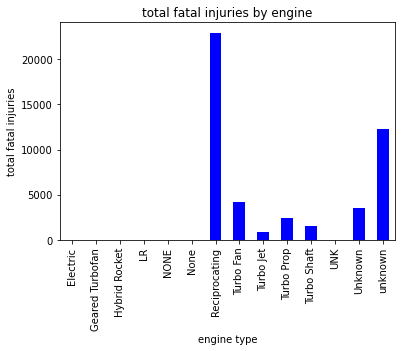

In [58]:
fatal_injuries_by_engine.plot(kind="bar",color="blue")
plt.title("total fatal injuries by engine")
plt.xlabel("engine type")
plt.ylabel("total fatal injuries");

In [59]:
fatal_injuries_by_model=merged_df.groupby("model")["total fatal injuries"].sum()

In [60]:
merged_df["model"].head()

0       108-3
1    PA24-180
2        172M
3         112
4         501
Name: model, dtype: object

In [61]:
merged_df["broad phase of flight"].head()

0      Cruise
1     Unknown
2      Cruise
3      Cruise
4    Approach
Name: broad phase of flight, dtype: object

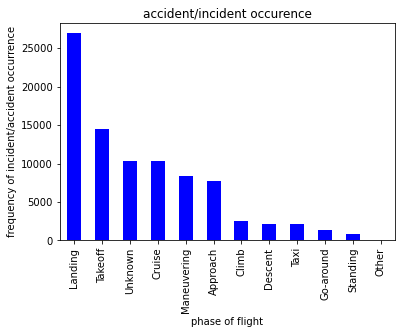

In [62]:
merged_df["broad phase of flight"].value_counts().plot(kind="bar",color="blue")
plt.title("accident/incident occurence")
plt.xlabel("phase of flight")
plt.ylabel("frequency of incident/accident occurrence");

In [63]:
merged_df.groupby("number of engines")["total fatal injuries"].value_counts()

number of engines  total fatal injuries
0                  0                       1045
                   1                        121
                   2                         15
                   5                          7
                   3                          4
                                           ... 
4                  230                        1
                   256                        1
                   270                        1
6                  0                          1
8                  0                          3
Name: total fatal injuries, Length: 197, dtype: int64